# Time Scale for the Start-up Flow with Slip

In [1]:
import pandas as pd
import numpy as np
import os

figDir = os.path.join(os.getcwd(), 'figures')
if not os.path.exists(figDir):
    os.mkdir(figDir)
    
def obtain_t_scale(s, percentage):
    '''Compute the relaxation time scale for startup flow with slip.
    
    Parameters:
    s : slip length ratio (slip length/ half the channel height)
    percentage : percentage to which the maximum velocity has been reached, e.g.
                percentage = 0.9 means that 90% of the maximum velocity have been 
                reached
    '''
    x_0 = 0.0
    dt = 0.001 # decrease for more accuracy
    N = 10
    t=0
    v_stat_max = cf.poiseuille_scaled(x_0,s) # maximum velocity in the center
    v_t_max = cf.navierSlip_scaled(t, x_0, s, N)
    
    # increase velocity until it is close enough to the maximum velocity
    while(abs(v_t_max/v_stat_max) < percentage):
        v_t_max = cf.navierSlip_scaled(t, x_0, s, N)
        t += dt
    return t

def lin_func(x, a, b):
    return a*x + b

# for this scaling, the pressure gradient G = -grad p 
# has to be scaled by G_scale = mu/(2*R*R)
# using G_scaled := G/G_scale
def charTimeScale(S, G_scaled):
    return S * G_scaled

## Obtain Time Scales

In [2]:
import numpy as np
import sys
sys.path.append('../')
#from theoretical.analytical.channel 
import modules.channel.channelFlows as cf

#percentages = [0.1,0.2,0.3,0.4, 0.5,0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
percentages = [0.9]
S = []
for i in range(-4,3):
    S.append(np.power(10,float(i)))
    #S.append(0.3*np.power(10,float(i)))
    S.append(0.5*np.power(10,float(i)))
S.insert(0,0.0)
S = sorted(S)

print("Percentages: " + str(percentages))
print("slip lenght ratio S: " + str(S))

# go through different scales
t_scales = {}
for p in percentages:
    t_scales[p] = {}
    for s in S:
        t_scales[p][s] = obtain_t_scale(s, p)

Percentages: [0.9]
slip lenght ratio S: [0.0, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


Time: 90% a=2.3 b=0.9


/tmp/ipykernel_1510208/3102782974.py:51: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim([min(S), max(S)+20])


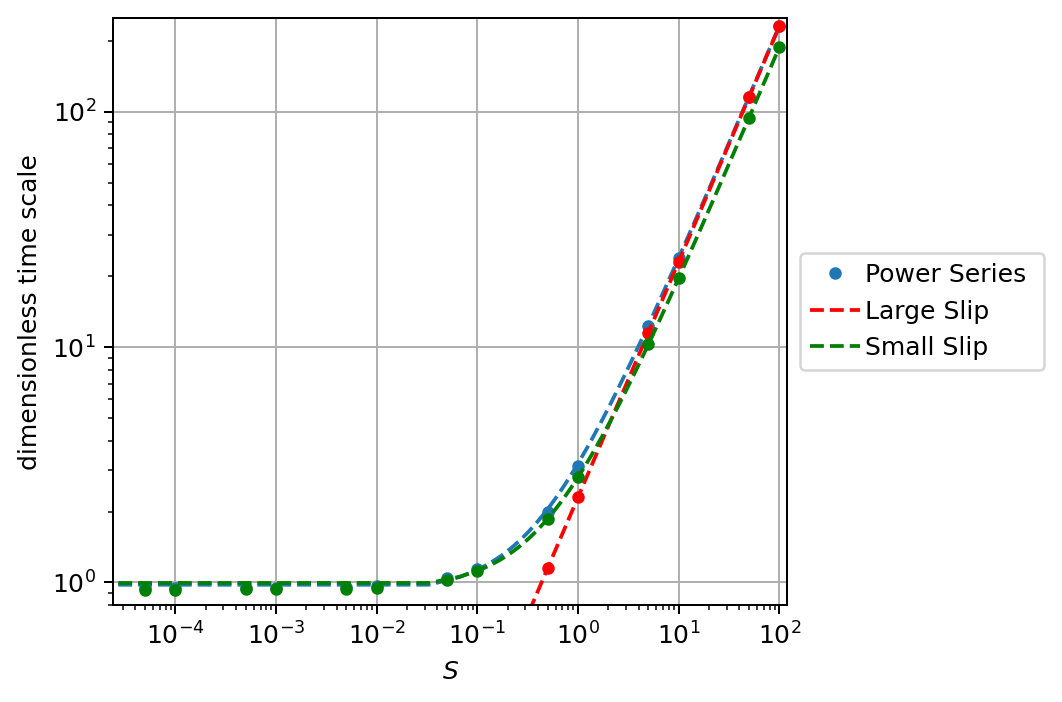

In [3]:
import scipy.optimize as opt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_dpi(180)
fig.set_tight_layout(True)

x_samp = list(S)
x_lin = np.linspace(0, max(x_samp), 3000)
ps = []
slopes = []
ordinate = []#ax1.legend(loc='lower left', ncol=2, columnspacing=0.4, title='$S$')

# plot time scales for different percentages
for p, t_scales_p in t_scales.items():
    if p > 0.1:
        line, = ax.loglog(S, list(t_scales_p.values()), \
               ls = '', marker='o', markersize=4,  label="Power Series ")
        color = line.get_color()
        
        # linear function from least square interpolation
        y_samp = list(t_scales_p.values())
        p0 = [2, 0.15]                                      # guessed params
        w, _ = opt.curve_fit(lin_func, x_samp, y_samp, p0=p0)     
        print("Time: " + str(int(100*p)) + '%' + " a=" + str(round(w[0],2)) + " b=" + str(round(w[1],2)))
        y_model = lin_func(x_lin, *w)
        ax.loglog(x_lin, y_model, ls='--', color=color, label=None)
        ps.append(p)
        slopes.append(w[0])
        ordinate.append(w[1])
        
#ax.semilogx(x_lin, ordinate[-3]+charTimeScale(x_lin, 0.9*2.5), color='black', label='dim. ana.')
###
largeSlip = [element * (np.log(10))  for element in S] #(np.log(10)/2)
ax.loglog(S, largeSlip,ls = '', marker='o', markersize=4,color='red', label='' )
p0 = [2, 0.15]                                      # guessed params
largew, _ = opt.curve_fit(lin_func, x_samp, largeSlip, p0=p0)     
largeSlip_model = lin_func(x_lin, *largew)
ax.loglog(x_lin, largeSlip_model, ls='--', color='red', label= "Large Slip")  
###
smallSlip = [(1+ 2*element) * ((4*np.log(10))/np.power(np.pi,2))  for element in S] #* ((2*np.log(10))/np.power(np.pi,2))
ax.loglog(S, smallSlip,ls = '', marker='o', markersize=4,color='green', label='' )
p0 = [2, 0.15]                                      # guessed params
smallw, _ = opt.curve_fit(lin_func, x_samp, smallSlip, p0=p0)     
smallSlip_model = lin_func(x_lin, *smallw)
ax.loglog(x_lin, smallSlip_model, ls='--', color='green', label= "Small Slip")  
###
ax.grid()
ax.set_xlabel('$S$')
ax.set_ylabel('dimensionless time scale');
ax.set_xlim([min(S), max(S)+20])
ax.set_ylim([0.8, 250])
ax.legend(loc="center left", ncol=1, columnspacing=0.4, handletextpad=0.2,bbox_to_anchor=[1.0,0.5])
#ax.show()
fig.savefig(figDir + "/charTimes.pdf")

Time: 90% a=1.87 b=0.95


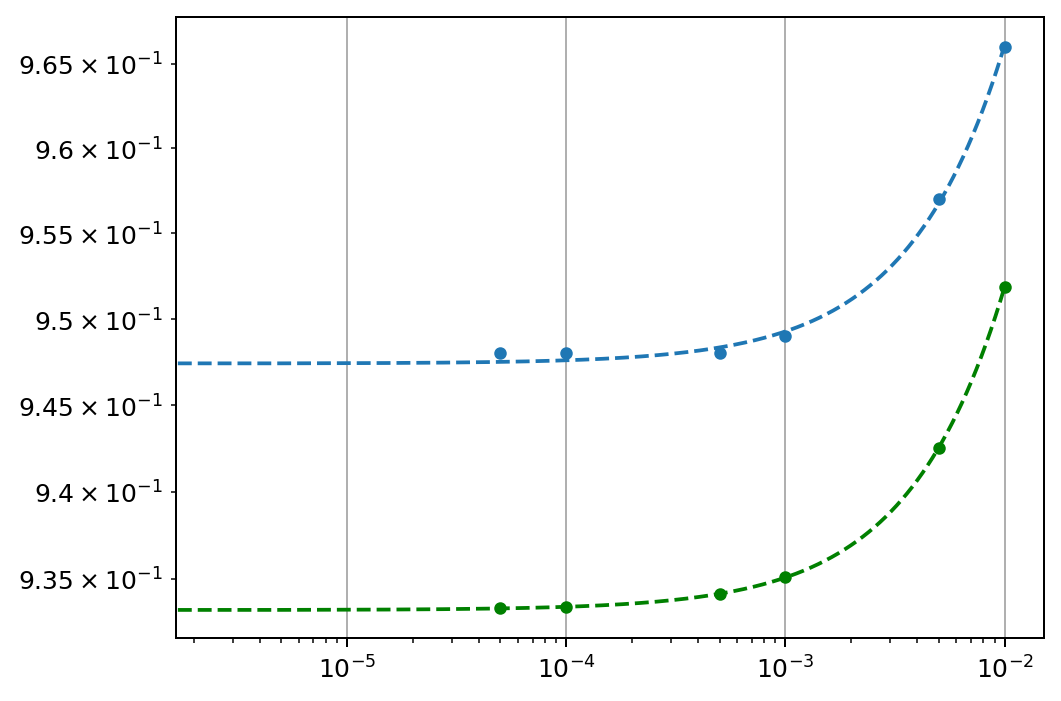

In [4]:
import scipy.optimize as opt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_dpi(180)
fig.set_tight_layout(True)

S1 = S[0:7]
for p, s1 in t_scales.items():
    p1 = p
    t_scales1 = list(s1.values())
t_scales1 = t_scales1[0:7]

x_samp = list(S1)
x_lin = np.linspace(0, max(x_samp), 4000)
ps = []
slopes = []
ordinate = []

# plot time scales for different percentages

if p1 > 0.1:
    line, = ax.loglog(S1, t_scales1, \
                   ls = '', marker='o', markersize=4,  label="ANA " + str(int(100*p)) + '%')
    color = line.get_color()
        
    # linear function from least square interpolation
    y_samp = t_scales1
    p0 = [2, 0.15]                                      # guessed params
    w, _ = opt.curve_fit(lin_func, x_samp, y_samp, p0=p0)     
    print("Time: " + str(int(100*p)) + '%' + " a=" + str(round(w[0],2)) + " b=" + str(round(w[1],2)))
    y_model = lin_func(x_lin, *w)
    ax.loglog(x_lin, y_model, ls='--', color=color, label=None)
    ps.append(p1)
    slopes.append(w[0])
    ordinate.append(w[1])
        
#ax.semilogx(x_lin, ordinate[-3]+charTimeScale(x_lin, 0.9*2.5), color='black', label='dim. ana.')
###
smallSlip = [(1+ 2*element) * ((4*np.log(10))/np.power(np.pi,2))  for element in S1] #* ((2*np.log(10))/np.power(np.pi,2))
ax.loglog(S1, smallSlip,ls = '', marker='o', markersize=4,color='green', label='' )
p0 = [2, 0.15]                                      # guessed params
smallw, _ = opt.curve_fit(lin_func, x_samp, smallSlip, p0=p0)     
smallSlip_model = lin_func(x_lin, *smallw)
ax.loglog(x_lin, smallSlip_model, ls='--', color='green', label=None)  
###
ax.grid()
plt.yticks([])
#ax.axis('off')
#ax.set_xlabel('$S$')
#ax.set_ylabel('dimensionless time scale');
#ax.set_xlim([min(S1), max(S1)])
#ax.set_ylim([-0.5, 0])
#ax.legend(loc="center left", ncol=1, columnspacing=0.4, handletextpad=0.2,bbox_to_anchor=[1.0,0.5])
#ax.show()
fig.savefig(figDir + "/charTimes_SmallSlip.pdf")

In [5]:
T = 4*np.log(10)/np.power(np.pi,2)
print(str(T))

0.9332025882374365


Time: 90% a=2.3 b=0.85


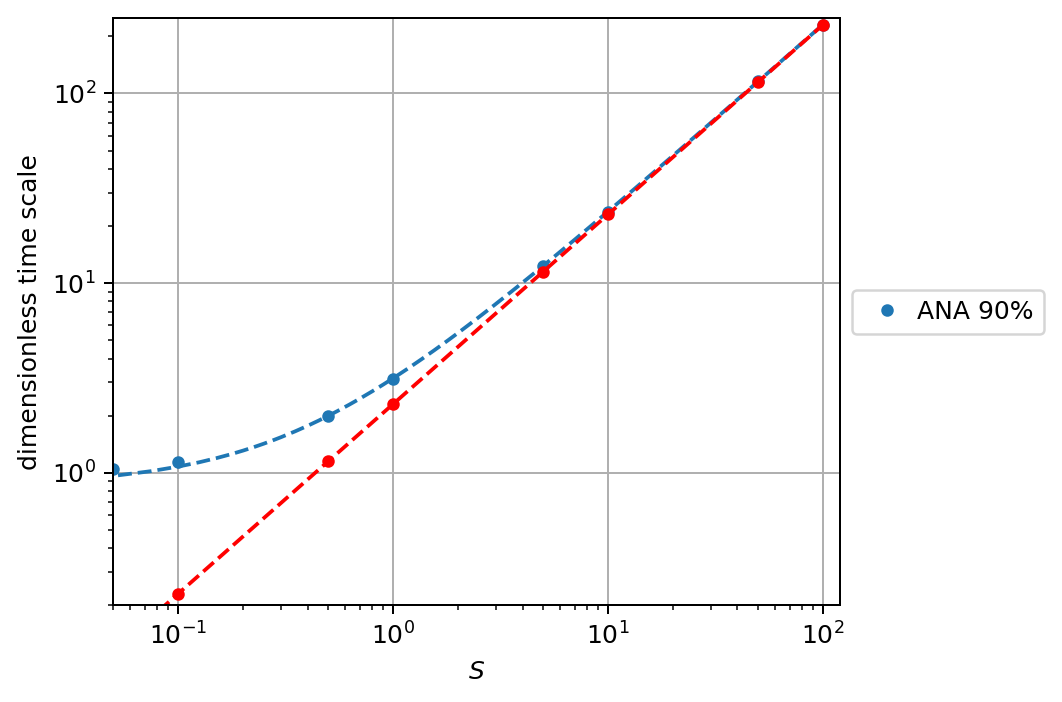

In [6]:
import scipy.optimize as opt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
fig.set_dpi(180)
fig.set_tight_layout(True)

S2 = S[7:]
for p, s2 in t_scales.items():
    p2 = p
    t_scales2 = list(s2.values())
t_scales2 = t_scales2[7:]

x_samp = list(S2)
x_lin = np.linspace(0, max(x_samp), 4000)
ps = []
slopes = []
ordinate = []

# plot time scales for different percentages

if p2 > 0.1:
    line, = ax.loglog(S2, t_scales2, \
               ls = '', marker='o', markersize=4,  label="ANA " + str(int(100*p)) + '%')
    color = line.get_color()
        
    # linear function from least square interpolation
    y_samp = t_scales2
    p0 = [2, 0.15]                                      # guessed params
    w, _ = opt.curve_fit(lin_func, x_samp, y_samp, p0=p0)     
    print("Time: " + str(int(100*p)) + '%' + " a=" + str(round(w[0],2)) + " b=" + str(round(w[1],2)))
    y_model = lin_func(x_lin, *w)
    ax.loglog(x_lin, y_model, ls='--', color=color, label=None)
    ps.append(p2)
    slopes.append(w[0])
    ordinate.append(w[1])
        
#ax.semilogx(x_lin, ordinate[-3]+charTimeScale(x_lin, 0.9*2.5), color='black', label='dim. ana.')
###
largeSlip = [element * (np.log(10))  for element in S2] #(np.log(10)/2)
ax.loglog(S2, largeSlip,ls = '', marker='o', markersize=4,color='red', label='' )
p0 = [2, 0.15]                                      # guessed params
largew, _ = opt.curve_fit(lin_func, x_samp, largeSlip, p0=p0)     
largeSlip_model = lin_func(x_lin, *largew)
ax.loglog(x_lin, largeSlip_model, ls='--', color='red', label=None)  
###

ax.grid()
ax.set_xlabel('$S$')
ax.set_ylabel('dimensionless time scale');
ax.set_xlim([min(S2), max(S2)+20])
ax.set_ylim([0.2, 250])
ax.legend(loc="center left", ncol=1, columnspacing=0.4, handletextpad=0.2,bbox_to_anchor=[1.0,0.5])
#ax.show()
#fig.savefig(figDir + "/charTimes.pdf")

In [7]:
import numpy as np
import os
import itertools
from os import path

#from theoretical.analytical.channel import channelFlows as cf

# fig_dir = os.path.join(os.getcwd(),'figures')
# data_dir = os.getcwd() + '''/../../dat/'''
# if not path.exists(data_dir):
#     os.mkdir(data_dir)
    
# temp = [10**e * np.linspace(1.0,9.0,9) for e in range(-6,10)] 
# S = list(itertools.chain.from_iterable(temp))
# S3 = S
# print("S: " + str(S3))


def computeCoeffs(sp, sm, N=10, tol=1e-15, eps=5e-15):
    # compute coeffs
    coeffsObj = cf.StartupCoefficients_scaled()
    Kn = coeffsObj.Kn(sp, sm, N, tol, eps)
    #An = coeffsObj.An(sp, sm, Kn) # depends on Kn

    return (Kn[0]) #, An[0])
    
# temp = [10**e * np.array([1.0, 4.0]) for e in range(-2,4)] 
# Sms = list(itertools.chain.from_iterable(temp))
# Sms.insert(0,0.0)
# Sms = S
# print("Sms: " + str(Sms))

#coeffsList = {}
coeffsList = []
# for sm in Sms:
#     coeffsList[sm] = {'kn':[], 'an':[]}
for sp in S:
    # create python coeffs
    coeffsList.append(computeCoeffs(sp, sp))
#    coeffPair = computeCoeffs(sp, sm)
#        coeffsList[sm]['kn'].append(coeffPair[0])
#        coeffsList[sm]['an'].append(coeffPair[1])
print('coeffsList'+ str(coeffsList))    
print('Done')

coeffsList[1.5707963267948966, 1.5707177909055139, 1.5706392628699022, 1.5700113212954978, 1.569227100981974, 1.5629815779918377, 1.5552451292561658, 1.496128951635857, 1.4288700112140755, 1.0768739863118042, 0.8603335890193811, 0.4328407199048198, 0.3110528482002968, 0.14095167637328243, 0.09983363855112654]
Done


NameError: name 'S' is not defined

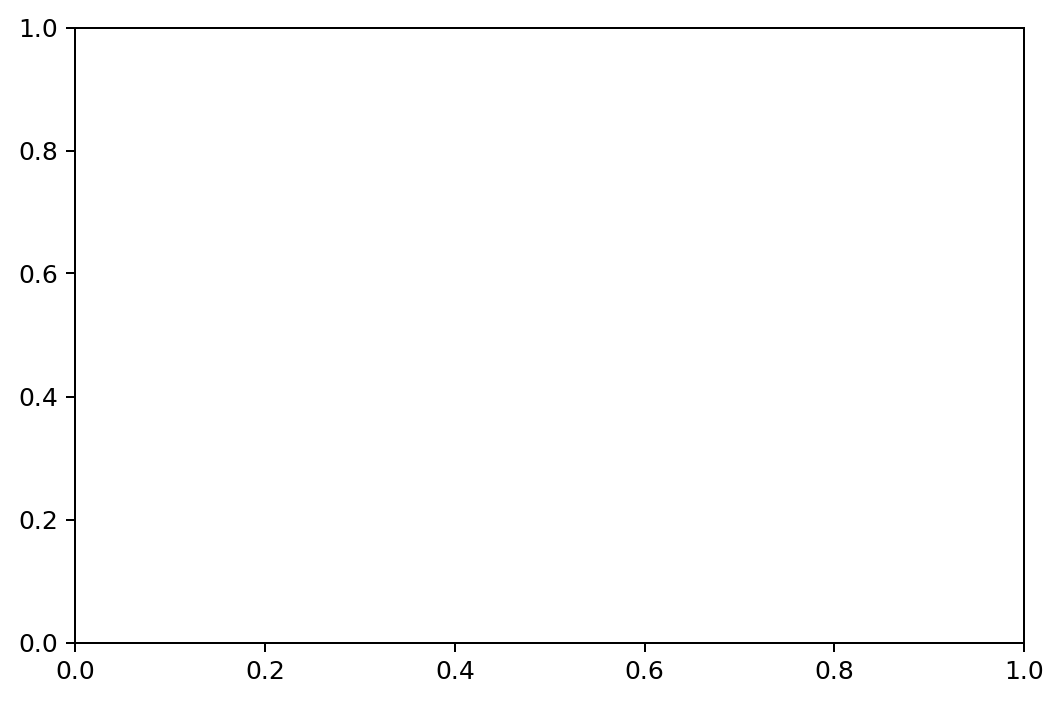

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import repeat
import numpy as np
from scipy.interpolate import BSpline, make_interp_spline


fig, ax1 = plt.subplots(1, 1)
fig.set_dpi(180)
fig.set_tight_layout(True)

x1_samp = list(S)
x1_lin = np.linspace(min(S), max(S), 600)

ax1.grid()
#ax1.set_prop_cycle(cc)
ax1.set_xlabel('$S= S^+= S^- $')
ax1.set_ylabel('$k_1$')
#ax1.set_xlim(S[9], S[-9])
ax1.set_ylim(0,2.5)

ax1.semilogx(S, coeffsList, ls = '', marker='o', markersize=4, color='blue', label="$k_1$")
ax1.semilogx(S, coeffsList, ls = '--', lw=2, color='blue', label=None)

Sp=S
Sp[10] = 1.01 
print("Sp" + str(Sp))
f1 = [np.pi/2 * (1-element)  for element in Sp]
print("f1: "  + str(f1) )
f1_lin = np.linspace(min(f1), max(f1), 600)
yhat = savgol_filter(f1, 51, 3)
ax1.semilogx(S, yhat, ls='--', lw=2, color='red', label= "Small Slip" )

# Sm = S
# Sm[0] = 1e-05
# f2 = [1/np.sqrt(element)  for element in Sm]
# print("f2: "  + str(f2) )
# f2_lin = np.linspace(min(f2), max(f2), 600)
# ax1.semilogx(S, f2, ls='--', lw=2, color='green', label= "Large Slip" )

# p0 = [2, 0.15]                                      # guessed params
# largew1, _ = opt.curve_fit(lin_func, x1_samp, f2, p0=p0)     
# f22 = lin_func(x1_lin, *largew1)




# exponent = -0.5
# xlaw = np.linspace(2e0, 1e3, 100)
# ylaw = 0.666*np.power(xlaw, exponent)
# ax1.loglog(xlaw, ylaw, label='$2/3 S_+^{' + str(round(exponent,3)) + str('}$'), ls='-.', color='black')

ax1.legend(loc="center left", ncol=1, columnspacing=0.4, handletextpad=0.2,bbox_to_anchor=[1.0,0.5])    
#ax1.legend(loc='lower left', ncol=2, columnspacing=0.4, title='$S$')
fig.savefig(figDir + '/' + 'k1_coeff_S.pdf', bbox_inches='tight')